# HW 2 Problem 1: Inspecting Auditory Responses

In this problem, you will investigate data collected in the lab of Christoph Schreiner at UCSF. This data was collected as part of an experiment that probed the impact of early experience on responses in auditory cortex. Seemingly simple manipulations of a young animal's environment can dramatically reshape its neural responses well into adulthood. For example, playing a repetitive pure tone at a single frequency to rat pups can cause their primary auditory cortex to become ∼50% larger, with a huge fraction of neurons selective to the exposure frequency (see [de Villers-Sidani et al., 2007](https://pubmed.ncbi.nlm.nih.gov/17202485/)). This neuroplasticity caused a stir when it was first discovered, both because it speaks to ideas about nature and nurture, and because it has therapeutic implications regarding, for example, restoring hearing through cochlear implants (restoring signals from the peripheral auditory nerve may not be enough if cortical processing has already adapted to the lack of input).

The data you will examine is from the following experimental setup: litters of rat pups were reared in a home cage with a speaker above it. The speaker continuously played a specific sound sequence as the young rats were growing up. You can hear the exposure stimulus (the stimulus they listened to while growing up) [here](https://drive.google.com/file/d/1l47YMZSkceV2G-rQVltpDkneQSydqGPb/view?usp=sharing). You will hear that the stimulus consists of a repetitive, chord-like, pulsating sound. The chord is pulsed specifically at 6Hz (6 pulses per second) - we call this the modulation frequency. After this sound exposure period, spiking responses were recorded in primary auditory cortex using silicon electrode probes.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Load inital data
data = np.load('exposure_stimulus.npz', allow_pickle=True)

spikes_single_neuron = data['spikes_single_neuron']
binned_spikes_exp = data['binned_spikes_exp']
binned_spikes_control = data['binned_spikes_control']

# I. Single neuron response to exposure stimulus

We will first look at the response of a single neuron to the exposure stimulus.

Above, we loaded in `spikes_single_neuron`. The data contain activity of one neuron from an animal in the experimental group (one that was reared with the stimulus present) in response to the exposure stimulus. 

These data are stored as an array of numpy arrays, where each inner array contains the spike times (in seconds) for a single trial. 

Recall that the exposure stimulus is a continuous chord pulse repeated at 6 Hz. So how did we get trials? Because the stimulus is periodic, we can treat each 1/6 of a second as a separate presentation of the same stimulus (a separate trial).


## Problem 1a (coding): How many trials are in `spikes_single_neuron`?

It might help to visualize this array of arrays to know what that means.

In [20]:
# How many trials are included in 'spikes_single_neuron'?
n_trials = len(spikes_single_neuron)
print(n_trials)

360


<br>**Next we'll make a raster plot to display the spikes on each "trial".**

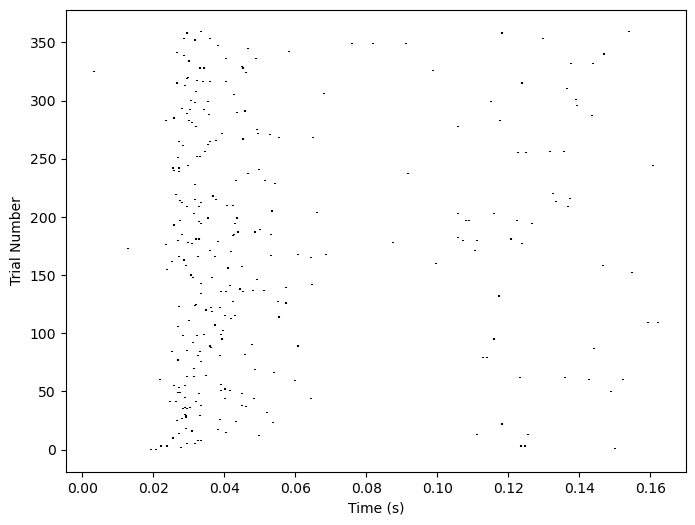

In [21]:
# Make raster plot of the data

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.eventplot(spikes_single_neuron, colors = 'black')
ax.set(xlabel = 'Time (s)', ylabel = 'Trial Number');


## Problem 1b (coding): Plotting a PSTH

To further investigate these responses, **plot a PSTH for this neuron in response to the stimuli**.

We first need to bin the spikes. First, we create an array, `binned_spikes`, where the rows correspond to trials and the columns correspond to different time bins. The number of time bins depends on the width of each time bin, which we can set with `bin_width`. Each entry is the number of spikes in that time bin in that trial.


In [22]:
# Bin spikes (no need for you to do anything in this cell, but read to understand how we create `binned_spikes`)

# Bin width in seconds
bin_width = 1/1000
# bin_widths = [0.2/1000, 1/1000, 5/1000, 10/1000, 25/1000, 50/1000]

# Figure out start time of each time bin
bin_edge_times = np.arange(0, 1/6 + bin_width, bin_width)

# Initialize binned_spikes array
binned_spikes = np.zeros((n_trials, len(bin_edge_times) - 1))

# Loop over trials
for i_trial in range(n_trials):

    # Get binned spikes using histogram method
    binned_spikes[i_trial, :], _ = np.histogram(spikes_single_neuron[i_trial], bins = bin_edge_times)

<br>**TO DO**: Compute the PSTH from the array `binned_spikes`. Note: we want this plot in units of spikes/second, not spikes/bin.

[Text(0.5, 0, 'Time (s)'), Text(0, 0.5, 'Spikes/s')]

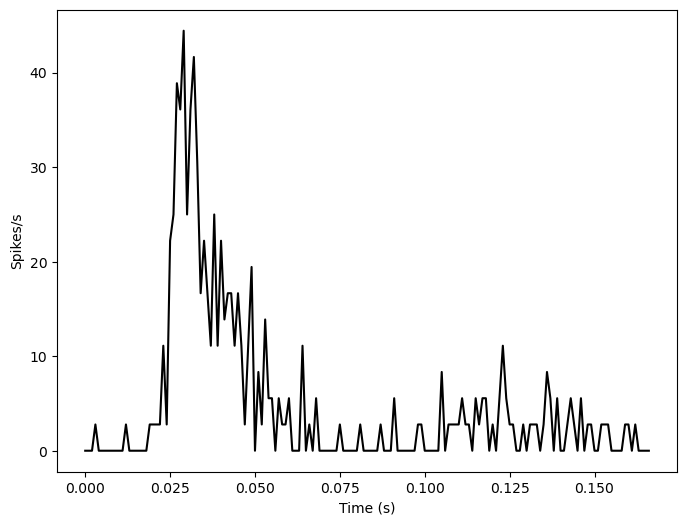

In [23]:
# TO DO: Compute PSTH
PSTH = binned_spikes.mean(axis=0) / bin_width

# Plot PSTH
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(np.arange(0, 1/6, bin_width), PSTH, 'k')

# TO DO: set axis labels
ax.set(xlabel="Time (s)", ylabel="Spikes/s")

## Problem 1c: Interpreting the PSTH


i) Try re-running the previous two code cells with different bin widths. Try .2 ms, 1 ms, 5 ms, 10 ms, 25 ms, and 50 ms. What is the issue with very small bins? Very big bins? About what size bin would you choose to use to convey the average firing rate of this neuron accurately?

ii) Does this neuron seem to respond to the stimulus? Would you call this more of an onset or sustained response?

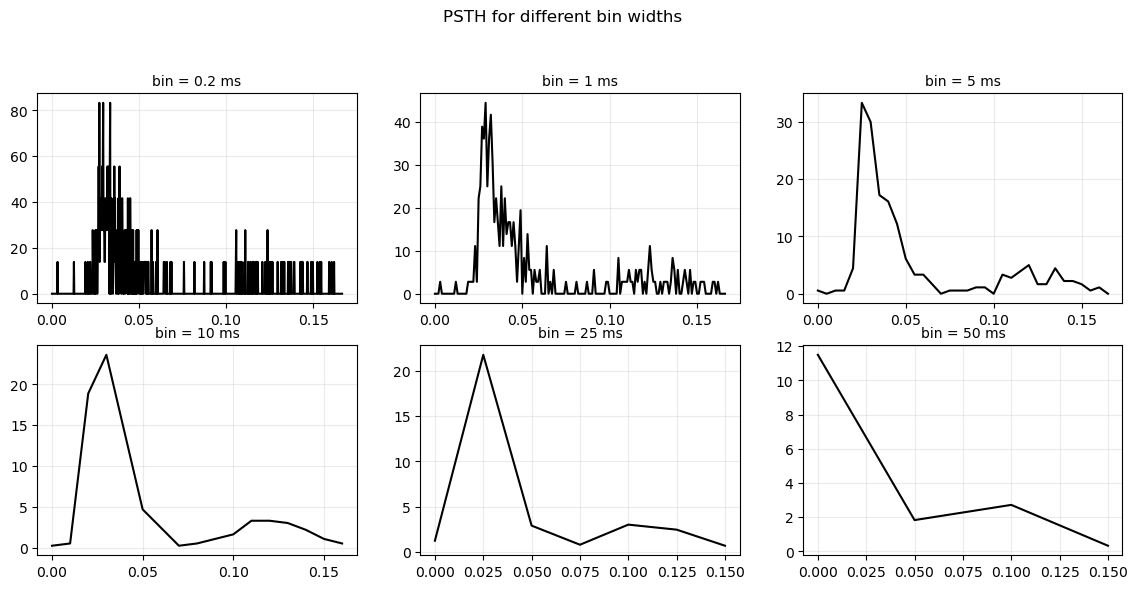

In [24]:
bin_widths = [0.2/1000, 1/1000, 5/1000, 10/1000, 25/1000, 50/1000]
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axes = axes.ravel()

for idx, bin_width in enumerate(bin_widths):
    ax = axes[idx]
    # Figure out start time of each time bin
    bin_edge_times = np.arange(0, 1/6 + bin_width, bin_width)

    # Initialize binned_spikes array
    binned_spikes = np.zeros((n_trials, len(bin_edge_times) - 1))

    # Loop over trials
    for i_trial in range(n_trials):

        # Get binned spikes using histogram method
        binned_spikes[i_trial, :], _ = np.histogram(spikes_single_neuron[i_trial], bins = bin_edge_times)

    PSTH = binned_spikes.mean(axis=0) / bin_width

    # Plot PSTH
    ax.plot(np.arange(0, 1/6, bin_width), PSTH, 'k', linewidth=1.5)
    ax.set_title(f"bin = {bin_width*1000:g} ms", fontsize=10)
    ax.grid(True, alpha=0.25)

fig.suptitle("PSTH for different bin widths", y=1.02)
plt.show()

<font color=#2AAA8A><span style="font-size:larger;">
**i** 

With very small bins (especially 0.2 ms, and to a lesser extent 1 ms), the PSTH becomes high in variance because most bins contain 0 spikes, and occasional spikes create sharp jumps, hence the blackened out regions. After converting to spikes/s which we do by dividing by in this case a very small time bin width, even small count differences get amplified, so the curve looks jittery. This mostly reflects sampling noise and trial-to-trial timing variability at an very fine timescale.

With very large bins like 25–50 ms we have the opposite problem, the PSTH is over smoothed, which means high bias. The rapid rise and fall of the response get averaged together inside big bins, which blurs the latency, reduces the peak, and can make a brief response look like a broad and slow change. Like this we lose the key temporal structure we’re looking for. 

A good bin size is a compromise between the variance and the bias. In our plots, 5 ms most clearly shows the response shape because it preserves the timing of the peak and decay while being smooth enough to interpret reliably. If I had to pick one for communication clarity, I’d choose 5 ms.

<font color=#2AAA8A><span style="font-size:larger;">
**ii**

Yes, this neuron clearly responds to a stimulus. You can see a sharp increase in firing shortly after the start of the trial, peaking around roughly 25–35 ms, followed by a rapid decay back toward baseline by roughly 70 ms. After that, activity stays relatively low with some small fluctuations. That pattern is an onset response because the firing rate is not maintained at an elevated level throughout the stimulus window, it rather spikes briefly and then returns toward baseline.

<br>

<span style="font-size:larger;">**Want an additional challenge?**

Now, _instead of binning_, convolve the PSTH and plot. What kernel type and width do you think captures the structure in the response well?

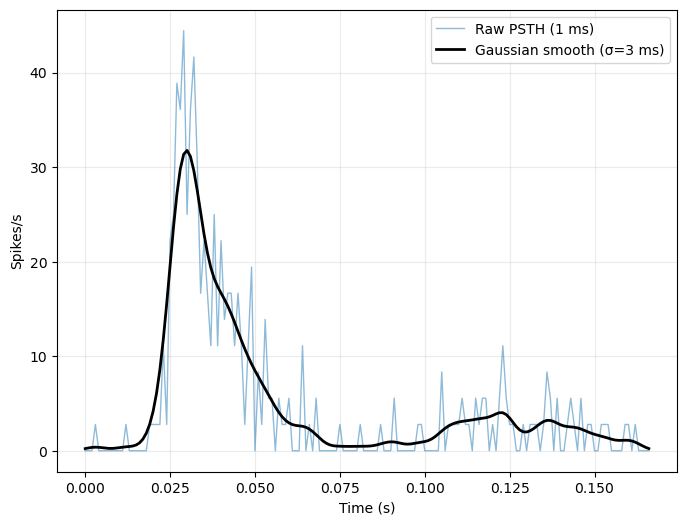

In [25]:
# CHALLENGE CODE
# previous code for binning spikes (rerun purposes only)
bin_width = 1/1000
bin_edge_times = np.arange(0, 1/6 + bin_width, bin_width)
binned_spikes = np.zeros((n_trials, len(bin_edge_times) - 1))
for i_trial in range(n_trials):
    binned_spikes[i_trial, :], _ = np.histogram(spikes_single_neuron[i_trial], bins = bin_edge_times)

# Bin spikes at 1 ms
bin_width = 1/1000
PSTH = binned_spikes.mean(axis=0) / bin_width

# convolve the PSTH with a Gaussian kernel
sigma_ms = 3
sigma_bins = int((sigma_ms/1000) / bin_width)

# build Gaussian kernel
x = np.arange(-4*sigma_bins, 4*sigma_bins + 1)
kernel = np.exp(-(x**2) / (2*sigma_bins**2))

# normalize the kernel so it averages
kernel = kernel / kernel.sum()

# convolve the PSTH with the kernel
PSTH_smooth = np.convolve(PSTH, kernel, mode="same")

# use bin centers for a correct time axis (matches PSTH length)
t = np.arange(0, 1/6, bin_width)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(t, PSTH, linewidth=1, alpha=0.5, label="Raw PSTH (1 ms)")
ax.plot(t, PSTH_smooth, "k", linewidth=2, label=f"Gaussian smooth (σ={sigma_ms} ms)")
ax.set(xlabel="Time (s)", ylabel="Spikes/s")
ax.legend()
ax.grid(True, alpha=0.25)


<br><br>
# II. Neural population response to exposure stimulus

Let's now look at more neurons collected from both experimental animals and control animals. These data are stored in `binned_spikes_exp` and `binned_spikes_control`. Each of these is an array with shape (number of neurons x trials x time bin). These bins are 5 ms wide. `binned_spikes_exp` contains the spiking responses of neurons recorded from animals in the experimental group (animals exposed to the simulus) and `binned_spikes_control` is data recorded from a control group (animals who weren't exposed).
<br>

In [26]:
# Optional steps to make sure you understand how the data are stored

bin_width = 5/1000   # bin width is fixed

print('Number of neurons in the experimental group: {}'.format(binned_spikes_exp.shape[0]))
print('Number of neurons in the control group: {}'.format(binned_spikes_control.shape[0]))
print('--')
print('Number of trials in the experimental group: {}'.format(binned_spikes_exp.shape[1]))
print('Number of trials in the control group: {}'.format(binned_spikes_control.shape[1]))
print('--')
print('Number of time bins in the experimental group: {}'.format(binned_spikes_exp.shape[2]))
print('Number of time bins in the control group: {}'.format(binned_spikes_control.shape[2]))


Number of neurons in the experimental group: 191
Number of neurons in the control group: 187
--
Number of trials in the experimental group: 360
Number of trials in the control group: 360
--
Number of time bins in the experimental group: 34
Number of time bins in the control group: 34


### Problem 1d (coding): Computing responses of control and experimental groups

We want to compare the average neural response to the stimulus in the experimental animal neurons to the average response in the control animal neurons. Compute a PSTH for each group and plot them both over time on the same plot to compare. This time it should be averaged over trials and neurons. This gives us information about the response properties of the whole population of neurons. Use `binned_spikes_exp` and `binned_spikes_control`.

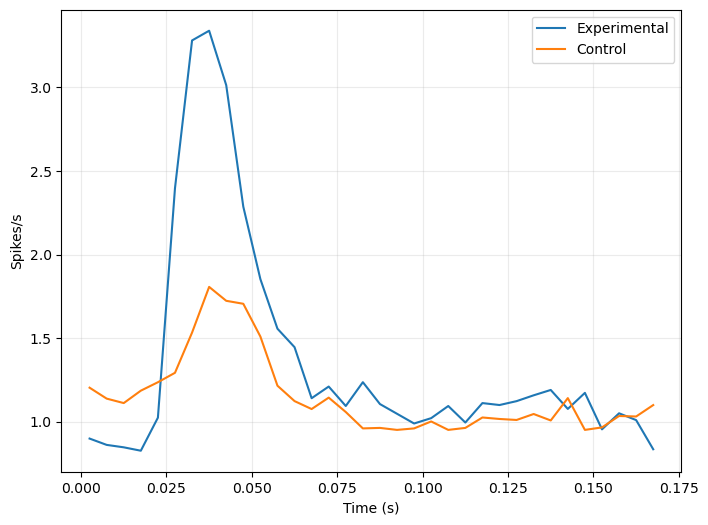

In [27]:
# TO DO: compute PSTHs over neurons and trials
# it should be averaged over trials and neurons
PSTH_exp = binned_spikes_exp.mean(axis=(0,1)) / bin_width
PSTH_control = binned_spikes_control.mean(axis=(0,1)) / bin_width


# TO DO: Plot the PSTHs (and label the two lines)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
n_bins = binned_spikes_exp.shape[2]
timevec = (np.arange(n_bins) + 0.5) * bin_width
ax.plot(timevec, PSTH_exp, label="Experimental")
ax.plot(timevec, PSTH_control, label="Control")
ax.set(xlabel='Time (s)', ylabel='Spikes/s')
ax.legend()
ax.grid(True, alpha=0.25)

plt.legend(loc='best');

### Problem 1e: Interpreting responses from control and experimental groups

i) What differences do you observe between the experimental and control groups? Did neurons become more or less responsive to the exposure stimulus?  Are there any differences in responses after the initial peak response?

ii) With the data provided, could you assess the modulation frequency (how quickly the amplitude oscillates) selectivity/tuning of these neurons? If yes, how? If no, why not?

<font color=#2AAA8A><span style="font-size:larger;">
**i**

The experimental group shows a much stronger, sharper onset peak shortly after the start of the trial around 0.03s. The peak firing rate is clearly higher than the control group, which suggests that neurons in the exposed animals became more responsive to the exposure stimulus, at least in the early part of the response. After that initial peak, both groups drop back toward a similar baseline level, and the difference becomes much smaller. Past about 0.075 s, the traces look pretty similar overall, with only small fluctuations, so the big effect is mainly the early transient response, not a large sustained difference later in the window.

<font color=#2AAA8A><span style="font-size:larger;">
**ii**

No. Here we’re only looking at responses to a stimulus with a single modulation frequency at 6 Hz, so we don’t have responses to multiple frequencies to compare. To measure frequency selectivity we’d need stimuli presented at different modulation rates like 2 Hz vs 6 Hz vs 12 Hz, and then compare firing rate changes or phase locking across those conditions. With this dataset alone we can only say how strongly the population responds to this one frequency, but we can’t tell whether it prefers 6 Hz versus other modulation frequencies.


# III. Single neuron response to DMR stimulus

Let's look at a neural response to a different stimulus. This time, the stimulus is a 'dynamic moving ripple' (DMR) stimulus, continuously on for 15 minutes. It contains a range of different spectral and temporal modulations. The stimulus can be viewed as a spectrogram, which represents the strength of different auditory frequencies over time. 

We load in the relevant data below, which contains the following variables: 
* `sp_times`, a list of spiking times in seconds for this neuron 
* `stim_spectrogram`, a 2D spectrogram of the DMR stimulus (here the rows index different frequencies and the columns index different time points) 
* `stim_freq`, a vector with the frequencies of each row in the spectrogram in Hz 
* `stim_time`, a vector with the time of each column in the spectrogram in seconds

In [28]:
data_dmr = np.load('dmr_stimulus_data.npz', allow_pickle=True)

sp_times = data_dmr['sp_times']
stim_spectrogram = data_dmr['stim_spectrogram']
stim_freq = data_dmr['stim_freq']
stim_time = data_dmr['stim_time']

<br>Let's visualize the DMR stimulus by plotting a spectrogram. Run the cell below to plot the the first 30 seconds of the stimulus.

In [29]:
import matplotlib as mpl
print(mpl.colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 

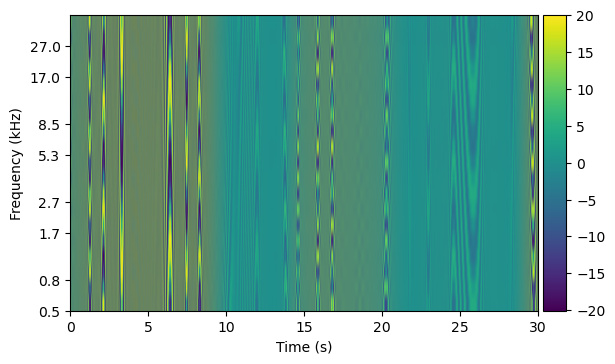

In [30]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_spectrogram(spect, time, freq, xlabel = None, ylabel = None, axis = None, max_time = None):
    time, freq = time.flatten(), freq.flatten()

    xlabel, ylabel = xlabel or 'Time (s)', ylabel or 'Frequency (kHz)'
    fig, ax = plt.subplots(1, 1)
    
    im = ax.imshow(spect, extent=[time[0], time[-1], 0, len(freq)], cmap="viridis")

    yticks = [int(i) for i in ax.get_yticks() if i < len(freq)]
    ylabels = np.round(freq[(yticks,)] / 1000, 1)

    if max_time:
      ax.set_xlim([0, max_time])

    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if axis:
        plt.axis(axis)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(im, cax=cax)

# Plot spectrogram of stimulus
plot_spectrogram(stim_spectrogram, stim_time, stim_freq, max_time = 30)

### Problem 1f (coding): Fix the spectrogram's colormap

Remember in Class 2 when I mentioned how atrocious the jet colormap is? Edit the code in the previous block so that the stimulus is plotted using a better color scheme. Choose a colormap that is appropriate for the data being displayed.
([Hint 1](https://matplotlib.org/stable/users/explain/colors/colormaps.html), [Hint 2](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow))

i. Change the colormap in the code above.

ii. Briefly explain why you chose the one you did.

<font color=#2AAA8A><span style="font-size:larger;">**ii**

I chose viridis because it’s perceptually uniform, meaning equal changes in the data look like equal changes in color to our eyes. That matters for a spectrogram because we want intensity differences across time and frequency to be interpreted consistently, without the colormap itself creating fake “boundaries” or exaggerating certain ranges.

### Problem 1g (coding): Computing a spike-triggered average

Generate a spike-triggered average (STA) for this neuron that extends 150 ms into the past and 150 ms into the future. That is, for each spike, cut out a segment of the stimulus corresponding to the 300 ms window centered on the spike, and average these together. The sampling rate of the stimulus is 5 ms (which means we've saved magnitude of all frequencies every 5 ms).

The array `sp_times` contains the actual spike times, whereas we need the binned spikes. There are two approaches for how to bin and compute the STA in this case:

1) Convert to binned spikes (look above in this doc for an example of converting to binned spikes) and compute the STA a very similar way to how we did it before. Hint: you probably want to use the same bin width for spikes as exists for the stimulus.

2) Loop over exact spike times and figure out what time bin (of the stimulus) each spiketime falls into. Note: make sure bin number is an integer. 

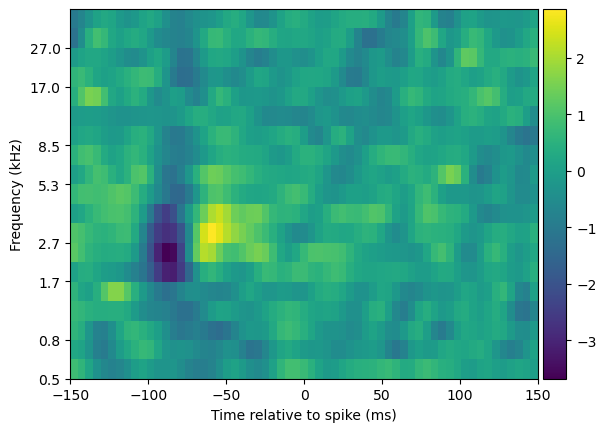

In [31]:
# Determine how long we want the STA to be
# note: binsize should remain 5 ms to match the stimulus spectrogram

STA_length_ms = 300
binsize = 5
STA_length = int(STA_length_ms / 5)
half_length = int(STA_length / 2)

# Initialize STA
STA = np.zeros((stim_freq.shape[0], STA_length+1))


# Compute STA
#TO DO
n_timebins = stim_spectrogram.shape[1]

dt = binsize / 1000
spike_bins = np.round(sp_times / dt).astype(int)

n_used = 0
for b in spike_bins:
    start = b - half_length
    end = b + half_length + 1
    # We need this check to ensure we only use segments of the stimulus that fully fit within the stimulus spectrogram
    if start < 0 or end > n_timebins:
        continue
    STA += stim_spectrogram[:, start:end]
    n_used += 1
STA /= n_used


# Plot the STA
plot_spectrogram(STA, np.array([-STA_length_ms / 2, STA_length_ms / 2]), stim_freq, xlabel='Time relative to spike (ms)', axis='auto')


### Problem 1h: Interpreting the STA

i)  Is the neuron responding to the stimulus that happened far in the past, far in the future, recently in the past, or recently in the future?

ii) What frequency is the neuron most selective to?

iii) What is the ideal duration of a tone at the preferred frequency to evoke the largest response? 

iv) If we didn't use this continuous and analysis method (STA) to extract the neuron's receptive field, how else could we have gotten a sense of what stimuli this neuron responds to? Describe the alternative experimental design and analysis approach. Why is the STA better?

<font color=#2AAA8A><span style="font-size:larger;">
**i**

Recently in the past, before the spike. The strongest structure is at negative times, at about 70-100 ms before the spike, with little structured signal in the future.

<font color=#2AAA8A><span style="font-size:larger;">
**ii**

around 2.5 kHz, centered near 2.5 kHz.

<font color=#2AAA8A><span style="font-size:larger;">
**iii**

A short tone, roughly 30 ms long that arrives after a brief dip in energy period in that band, the purple to yellow transition, should drive the biggest response. The excitatory yellow lobe is fairly brief in time, so a short tone whose duration roughly matches that lobe should drive the largest response.

<font color=#2AAA8A><span style="font-size:larger;">
**iv**

An alternative approach would be to present many short tone pips while systematically varying frequency, duration, or modulation rate then measure either spike counts or a PSTH after each tone to build a tuning curve or response map. This method tells us which tones increase firing, but it depends on the specific stimuli we chose to test. The STA is better here because it uses a continuous, rich stimulus that naturally has many spectrotemporal patterns, and this lets us find the precise pattern that precedes spikes, and also includes excitatory and suppressive structure, the purple and the yellow segments, rather than being limited to a discrete grid of tones.

